# Question 1 : What is the purpose of grid search cv in machine learning, and how does it work?
# Ans
-------
The purpose of GridSearchCV in machine learning is to systematically search for the optimal hyperparameters for a given model within a specified parameter grid. It helps in automating the process of hyperparameter tuning by searching through a manually specified subset of the hyperparameter space.

Here's how it works:

1. **Parameter Grid Specification:**
   - Define a grid of hyperparameters that you want to optimize.
   - For instance, if you're working with a Random Forest classifier, parameters like number of trees, max depth, and criterion can be part of this grid.

2. **Cross-Validation:**
   - GridSearchCV uses cross-validation to assess model performance for each combination of hyperparameters.
   - Typically, k-fold cross-validation is used, dividing the dataset into k subsets. It trains the model k times, using k-1 folds for training and the remaining fold for validation.

3. **Evaluation of Hyperparameters:**
   - For every combination of hyperparameters specified in the grid, the model is trained using the training data.
   - The performance is then evaluated using the validation set.
   - Performance metrics are recorded, often based on a scoring metric (e.g., accuracy, F1-score) set during initialization.

4. **Selection of Best Hyperparameters:**
   - After evaluating all combinations, GridSearchCV identifies the set of hyperparameters that yield the best performance based on the scoring metric.
   - It then fits the model on the entire dataset using these optimal hyperparameters.

5. **Model Training and Selection:**
   - Finally, the model with the best hyperparameters is trained on the entire dataset using the selected hyperparameters for making predictions on new data.

### Purpose:

GridSearchCV streamlines the process of hyperparameter tuning by exhaustively searching through a predefined hyperparameter space, allowing the identification of the best hyperparameters for a model. It aids in improving model performance, enhancing generalization, and automates the process of selecting the best combination of hyperparameters for a given model.

However, as the grid search examines every combination specified in the grid, it can be computationally expensive, especially with large datasets and a wide range of hyperparameters. Techniques like RandomizedSearchCV or Bayesian optimization are alternatives that aim to optimize hyperparameters more efficiently.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the dataset (Replace this with your dataset)
data = load_iris()
X, y = data.data, data.target

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


# Question 2 : Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?
# Ans
------

### GridSearchCV:
- **Exploration Method:** Exhaustive search through a predefined set of hyperparameters.
- **Search Strategy:** Tests all possible combinations within the specified hyperparameter grid.
- **Advantages:**
  - Guarantees finding the best hyperparameters within the specified grid.
  - Suitable for a smaller range of hyperparameters.
- **Disadvantages:**
  - Computationally expensive, especially with larger datasets or when the hyperparameter space is vast.
  - Might be less efficient when only a few hyperparameters significantly impact performance.

### RandomizedSearchCV:
- **Exploration Method:** Samples a fixed number of hyperparameter settings from specified probability distributions.
- **Search Strategy:** Randomly selects a defined number of combinations for evaluation.
- **Advantages:**
  - More efficient in exploring a large hyperparameter space as it does not try all possible combinations.
  - Can handle a wider range of hyperparameters without an exhaustive search.
- **Disadvantages:**
  - There's a chance (though low) of missing the optimal combination due to randomness.
  - Might not guarantee finding the best hyperparameters as in GridSearchCV.

### When to Choose:
- **GridSearchCV:** Use when the hyperparameter space is relatively small and all hyperparameters are expected to have a significant impact on performance. It's also suitable when computational resources allow for an exhaustive search.
- **RandomizedSearchCV:** Opt for this when dealing with a larger hyperparameter space or when computational resources are limited. It can efficiently sample the hyperparameter space without testing every possible combination.

In practice, RandomizedSearchCV is often preferred for initial exploration or when the hyperparameter space is vast, while GridSearchCV is used for a focused, detailed search within a limited space or for smaller datasets, ensuring the best hyperparameters are identified.

It's also possible to use both: conduct an initial broad search with RandomizedSearchCV to narrow down the hyperparameters and then apply GridSearchCV for a more detailed and refined search within the narrowed-down range.

# Question 3 : What is data leakage, and why is it a problem in machine learning? Provide an example.
# Ans
-----
Data leakage in machine learning occurs when information from outside the training dataset is used to create or evaluate a model. It causes the model to learn patterns that won't generalize to new, unseen data, leading to overly optimistic performance metrics during training but poor performance on real-world data. Data leakage can arise in various ways, including:

### Types of Data Leakage:

1. **Training with Test Data:**
   - Using information from the test set (or any data that wouldn't be available during deployment) in the training phase.

2. **Information from the Future:**
   - In time-series data, using future information to predict the past.
  
3. **Target Leakage:**
   - When data that directly includes the target information is used to create the model. For instance, using a column derived from the target variable.

### Why is it a Problem?

Data leakage leads to an overestimation of the model's performance and undermines its ability to generalize to new, unseen data. The model appears more accurate during training but fails in real-world scenarios. This discrepancy occurs because the model learns from information that won't be available when it's used for predictions, resulting in an inaccurate assessment of the model's capabilities.

### Example:

Consider a credit card fraud detection system. If the model is trained using transaction amounts, and after the transaction, it's flagged as fraudulent, then using the transaction amount directly could lead to data leakage. The model could learn that specific transaction amounts are associated with fraud, which is an outcome of the fraud identification process itself. Hence, during deployment, it won't have access to that information to make predictions, leading to poor performance.

To avoid data leakage, it's crucial to ensure that the model is trained only on information available at the time of prediction and that no data from the prediction period is included in the training dataset. It's essential to thoroughly preprocess and partition the data to avoid inadvertently leaking information that could bias the model's learning process.

# Question 4: How can you prevent data leakage when building a machine learning model?
# Ans
-----
To prevent data leakage and maintain the integrity of your machine learning model, follow these best practices:

### 1. **Partitioning Data:**
   - **Train-Validation-Test Split:** Segregate data into three subsets: training, validation, and test sets. Ensure the model is trained on the training set only.
   - **Temporal Split:** In time-series data, use an earlier time period for training and a later period for testing.

### 2. **Feature Engineering:**
   - **Create Features Based on Training Data:** Derive features from the training set without using information from the validation or test sets.

### 3. **Preprocessing:**
   - **Handle Missing Values Appropriately:** Impute missing values based only on information from the training set.
   - **Scaling/Normalization:** Fit scaling/normalization based on the training set and apply the same transformation to the validation and test sets.

### 4. **Feature Selection:**
   - **Use Only Training Data for Feature Selection:** Perform feature selection methods (e.g., information gain, correlation) using only the training set.

### 5. **Cross-Validation:**
   - **Nested Cross-Validation:** Avoid information leakage during hyperparameter tuning by using nested cross-validation.

### 6. **Target Leakage:**
   - **Remove Features with Target Information:** Identify and remove features that might leak target information.

### 7. **Be Mindful of the Data Pipeline:**
   - Ensure that your entire data pipeline, from data collection to preprocessing, is devoid of any data leakage.

### 8. **Documentation and Awareness:**
   - Clearly document the sources of data and preprocessing steps to raise awareness of potential sources of leakage.



# Question 5 : What is a confusion matrix, and what does it tell you about the performance of a classification model?
# Ans
-------
A confusion matrix is a table used to evaluate the performance of a classification model. It allows visualization of the model's performance in making predictions in comparison to the actual outcomes.

### Components of a Confusion Matrix:

1. **True Positives (TP):**
   - Instances correctly predicted as positive.

2. **True Negatives (TN):**
   - Instances correctly predicted as negative.

3. **False Positives (FP) - Type I error:**
   - Instances incorrectly predicted as positive when they are actually negative.

4. **False Negatives (FN) - Type II error:**
   - Instances incorrectly predicted as negative when they are actually positive.

### Interpretation:

The confusion matrix provides insight into various performance metrics:

1. **Accuracy:**
   - The overall accuracy of the model, calculated as $(TP + TN) / (TP + TN + FP + FN)$.

2. **Precision:**
   - The proportion of true positive predictions among all positive predictions, calculated as $TP / (TP + FP)$. It reflects the model's ability to avoid false positives.

3. **Recall (Sensitivity or True Positive Rate):**
   - The proportion of actual positives that were correctly identified, calculated as $TP / (TP + FN)$. It measures the model's ability to find all positive instances.

4. **Specificity (True Negative Rate):**
   - The proportion of actual negatives that were correctly identified, calculated as $TN / (TN + FP)$. It measures the model's ability to find all negative instances.

5. **F1 Score:**
   - The harmonic mean of precision and recall, balancing both metrics. It is calculated as $2 * (Precision * Recall) / (Precision + Recall)$.

### Usefulness:

- Confusion matrices are instrumental in identifying the strengths and weaknesses of a classification model.
- They help in understanding where the model might be making errors, such as classifying one class as another, and thus aid in fine-tuning the model for better performance.
- The matrix allows a comprehensive view of various performance metrics and trade-offs between precision and recall, essential in different real-world applications.

By evaluating the confusion matrix, it becomes easier to understand the classification model's behavior and make adjustments to improve its performance for specific use cases or requirements.


# Question 6 : Explain the difference between precision and recall in the context of a confusion matrix.
# Ans
-------
confusion matrix, precision and recall are two essential metrics used to evaluate the performance of a classification model. They represent different aspects of the model's ability to correctly identify instances of a particular class.

### Precision:
- **Definition:** Precision measures the proportion of correctly predicted positive instances out of all instances the model predicted as positive.
- **Formula:** Precision = TP / (TP + FP) where TP is true positives and FP is false positives.
- **Interpretation:** It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
- **Focus:** Emphasizes avoiding false positives. A high precision means the model makes few incorrect positive predictions.

### Recall (Sensitivity or True Positive Rate):
- **Definition:** Recall measures the proportion of actual positive instances that were correctly predicted by the model.
- **Formula:** Recall = TP / (TP + FN) where TP is true positives and FN is false negatives.
- **Interpretation:** It answers the question: "Of all the actual positive instances, how many did the model predict as positive?"
- **Focus:** Emphasizes identifying all positive instances. A high recall means the model captures most positive instances, minimizing false negatives.

### Difference:

- **Precision focuses on:** Precision aims to minimize false positives, making it useful when the cost of false positives is high. For instance, in medical diagnosis, a high precision ensures that the instances classified as positive are indeed positive, reducing the chance of misdiagnosis.
- **Recall focuses on:** Recall aims to minimize false negatives, making it useful when missing positive instances is costly. In scenarios like fraud detection, high recall is essential to capture most fraudulent cases, even if some non-fraudulent cases are also flagged.

### Balancing Precision and Recall:

- Precision and recall often have an inverse relationship. Improving one may affect the other.
- The F1 Score, the harmonic mean of precision and recall, helps balance these metrics, providing an overall evaluation of the model's performance.

Understanding precision and recall in the context of a confusion matrix is crucial for choosing an appropriate evaluation metric based on the specific goals of the classification task.

# Question 7 : How can you interpret a confusion matrix to determine which types of errors your model is making?
# Ans
------
Analyzing a confusion matrix provides valuable insights into the errors made by a classification model. By examining the matrix, you can identify the different types of errors the model is making:

### Types of Errors:

1. **False Positives (FP):**
   - These are instances where the model predicted the class as positive, but it was actually negative.
   - Examples: Predicting a non-fraudulent transaction as fraudulent in a fraud detection system.

2. **False Negatives (FN):**
   - Instances where the model predicted the class as negative, but it was actually positive.
   - Examples: Predicting a disease-free patient as having the disease in a medical diagnosis.

### Analyzing the Confusion Matrix:

- **Diagonal Elements (True Predictions):**
  - The main diagonal represents true positive (TP) and true negative (TN) instances, where the model predicted correctly.
  - A large value on the diagonal suggests the model is performing well in these areas.

- **Off-diagonal Elements (Errors):**
  - Non-diagonal elements represent errors - false positives (FP) and false negatives (FN).
  - Observing higher values in these elements indicates areas where the model is making mistakes.

### Interpretation:

1. **High False Positives (FP):**
   - If there's a high number of false positives, it means the model is incorrectly classifying negative instances as positive.
   - This suggests a lack of specificity, leading to overestimation of the positive class.

2. **High False Negatives (FN):**
   - A high number of false negatives implies the model is incorrectly classifying positive instances as negative.
   - This signifies a lack of sensitivity and a failure to capture positive instances.

### Application:

- Understanding the types of errors allows for targeted improvements:
  - Addressing false positives enhances specificity.
  - Addressing false negatives enhances sensitivity.

By interpreting the confusion matrix, you gain a clear understanding of the model's strengths and weaknesses, facilitating adjustments to improve its performance for specific use cases or requirements.

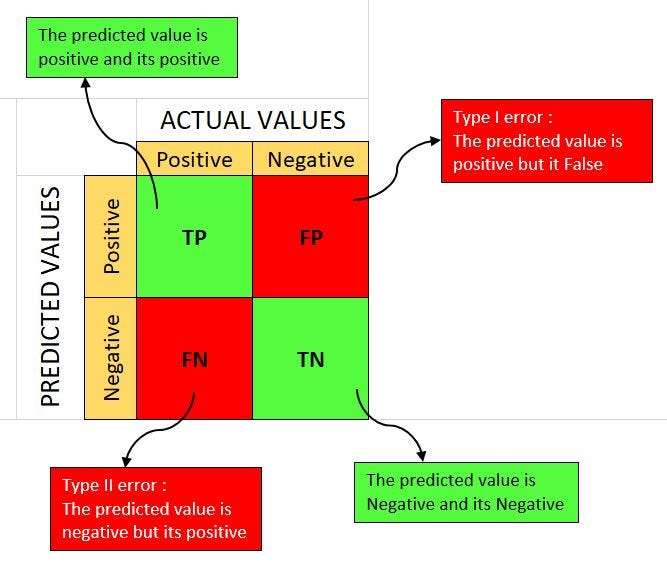

# Question 8 : What are some common metrics that can be derived from a confusion matrix, and how are they calculated
# Ans
--------
Various metrics can be derived from a confusion matrix, offering different insights into a model's performance in a classification task. Some common metrics include:

### 1. Accuracy:
- **Calculation:** $( \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $)
- **Interpretation:** The proportion of correctly predicted instances out of the total predictions.

### 2. Precision:
- **Calculation:** $( \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $)
- **Interpretation:** The proportion of correctly predicted positive instances out of all instances predicted as positive.

### 3. Recall (Sensitivity):
- **Calculation:** $( \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $)
- **Interpretation:** The proportion of actual positive instances correctly predicted by the model.

### 4. Specificity:
- **Calculation:** $( \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} $)
- **Interpretation:** The proportion of actual negative instances correctly predicted by the model.

### 5. F1 Score (F1-Measure):
- **Calculation:** $( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $)
- **Interpretation:** The harmonic mean of precision and recall, providing a balance between the two metrics.

### 6. False Positive Rate (FPR):
- **Calculation:** $( \text{FPR} = 1 - \text{Specificity} $)
- **Interpretation:** The proportion of actual negatives incorrectly predicted as positive.

### 7. False Negative Rate (FNR):
- **Calculation:** $( \text{FNR} = 1 - \text{Recall} $)
- **Interpretation:** The proportion of actual positives incorrectly predicted as negative.

These metrics offer diverse perspectives on a model's performance. Accuracy provides an overall view, while precision, recall, specificity, and others focus on specific aspects of the model's behavior, such as its ability to minimize false positives or negatives. Selecting the appropriate metrics depends on the application and the importance of correctly identifying certain classes in the classification problem.

# Question 9 : What is the relationship between the accuracy of a model and the values in its confusion matrix?
# Ans
---------
The relationship between the accuracy of a model and the values in its confusion matrix is essential in understanding the model's overall performance and the proportion of correct predictions.

### Accuracy and Confusion Matrix:

- **Accuracy:** Represents the proportion of correct predictions out of all predictions made by the model.
  - $( \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $)

- **Confusion Matrix Elements:**
  - True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN).

### Relationship:

- **Accuracy is Calculated from Confusion Matrix:**
  - The accuracy metric utilizes the values from the confusion matrix to determine the proportion of correct predictions relative to all predictions.
  - It is derived from the sum of true positives (TP) and true negatives (TN) divided by the total number of predictions.

- **Interdependency with Confusion Matrix Values:**
  - Accuracy directly relates to the correct predictions (TP and TN) and how they compare to the total predictions made by the model (sum of all confusion matrix elements).

### Implications:

- **High Accuracy:** Indicates a larger proportion of correct predictions concerning the total predictions made by the model.
- **Low Accuracy:** Implies a higher ratio of incorrect predictions in relation to the total predictions.

### Summary:

The accuracy of a model is fundamentally linked to the values in its confusion matrix, as accuracy is essentially a function of the true positives, true negatives, false positives, and false negatives. The accuracy metric provides an overview of the model's success in making correct predictions relative to the total number of predictions and is directly influenced by the values in the confusion matrix.

# Question 10 : How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?
# Ans
--------
A confusion matrix is a valuable tool to identify potential biases or limitations in a machine learning model, offering insights into where the model performs well and where it struggles. Here's how it helps:

### 1. Disparities in Performance:
- **Class Imbalance:** When the classes are imbalanced, a model might show a bias towards the majority class. The confusion matrix highlights a higher number of false negatives or false positives in the minority class, indicating where bias might exist.

### 2. Error Types:
- **Unequal False Positives/Negatives:** Identify unequal false positives or negatives across different classes. Consistently higher false positives in a specific class indicate model bias towards false positives in that class.

### 3. Trade-offs:
- **Precision-Recall Trade-off:** Understanding the trade-offs between precision and recall helps identify limitations. A model may sacrifice precision for recall or vice versa, indicating the presence of limitations in correctly classifying certain classes.

### 4. Feature Importance:
- **Impact on Specific Classes:** If a model consistently misclassifies a particular class, it could indicate that certain features strongly influence predictions for that class, leading to biases or limitations.

### 5. Sensitivity Analysis:
- **Analyzing Misclassifications:** Sensitivity analysis of misclassified instances helps identify patterns where the model struggles, indicating potential biases or limitations.

### 6. Discrepancies in Performance:
- **Domain-Specific Issues:** The confusion matrix may reveal domain-specific issues where the model might be limited by the available data or the representation of certain classes.

### 7. Addressing Limitations:
- **Model Refinement:** Understanding biases helps in fine-tuning the model, such as adjusting class weights, modifying features, or re-evaluating the target variable, to mitigate these biases.

By examining the confusion matrix, identifying patterns of incorrect predictions across different classes, and understanding the trade-offs between various performance metrics, one can uncover biases and limitations in the model. This understanding is crucial in refining the model's performance and making it more robust and equitable across all classes in the dataset.